In [8]:
import os, json
import numpy as np

import sys
!{sys.executable} -m pip install matplotlib pandas
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
def parser(data):

    random = []
    greedy = []
    sarsa = []
    for d in data:
        n = max(d['physical network']['nodes'][-1], d['virtual network']['nodes'][-1])

        random.append([n, d['random-agent']])
        greedy.append([n, d['greedy-neighbors-agent']])
        for s in d['sarsa']:
            sarsa.append([n, s['param']['epsilon'], s['param']['alpha'], s['param']['gamma'], s['reward']])

    random = pd.DataFrame(random, columns= ['nodes', 'reward'])
    greedy = pd.DataFrame(greedy, columns= ['nodes', 'reward'])
    sarsa = pd.DataFrame(sarsa, columns= ['nodes', 'epsilon', 'alpha', 'gamma', 'reward'])
    return random, greedy, sarsa

In [21]:
path = "../data/benchmark/20210610115419/"
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]
num_exp = len(json_files)

In [22]:
data = []
for index, js in enumerate(json_files):
    with open(os.path.join(path, js)) as json_file:
        data.append(json.load(json_file))

In [24]:
random, greedy, sarsa = parser(data)
num_exp = len(random)
delta = sarsa['gamma'][1] - sarsa['gamma'][0]
epochs = len(random["reward"][0])

In [26]:
random

,nodes,reward
0,3,"[1, 11, 12, 22, 12, 22, 23, 33, 23, 24, 34, 44..."
1,3,"[10, 20, 30, 40, 30, 40, 50, 51, 61, 62, 63, 5..."
2,4,"[10, 11, 21, 22, 12, 22, 23, 13, 14, 15, 25, 1..."
3,3,"[10, 20, 21, 22, 32, 22, 32, 42, 43, 44, 54, 4..."
4,3,"[10, 20, 21, 31, 32, 22, 32, 42, 52, 62, 63, 5..."
5,3,"[10, 11, 21, 22, 32, 22, 32, 42, 43, 53, 54, 5..."
6,4,"[10, 20, 30, 40, 50, 60, 61, 71, 61, 71, 81, 9..."
7,3,"[10, 20, 30, 31, 41, 42, 32, 42, 52, 53, 63, 7..."
8,4,"[10, 20, 30, 20, 21, 31, 41, 42, 32, 42, 43, 4..."
9,3,"[10, 11, 21, 31, 41, 31, 41, 42, 52, 53, 63, 5..."


In [41]:
S = np.array([s for s in random["reward"]])
Ravg_random = S.mean(axis=0)

In [42]:
S = np.array([s for s in greedy["reward"]])
Ravg_greedy = S.mean(axis=0)

In [44]:
Ravg_sarsa = []

for e in np.arange(0, 1+delta, delta):
    for a in np.arange(0, 1+delta, delta):
        for y in np.arange(0, 1+delta, delta):

            S = sarsa.loc[sarsa['epsilon']==e].loc[sarsa['alpha']==a].loc[sarsa['gamma']==y]['reward']
            S = np.array([s for s in S])
            Ravg_sarsa.append([[e, a, y], S.mean(axis=0)])

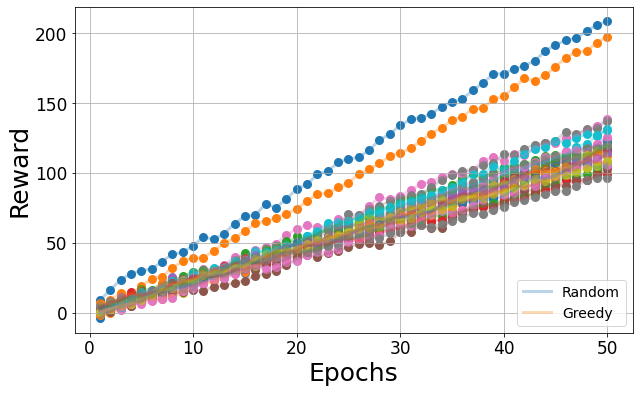

In [45]:
plt.figure(figsize=(10,6))

# plot data
plt.scatter(range(1,epochs+1), Ravg_random, linewidth=3)
plt.plot(range(1,epochs+1), Ravg_random, linewidth=3, alpha=0.3, label='Random')

plt.scatter(range(1,epochs+1), Ravg_greedy, linewidth=3)
plt.plot(range(1,epochs+1), Ravg_greedy, linewidth=3, alpha=0.3, label='Greedy')

for r in Ravg_sarsa:
    plt.scatter(range(1,epochs+1), r[1], linewidth=3)
    plt.plot(range(1,epochs+1), r[1], linewidth=3, alpha=0.3)

# plot beauty
plt.ylabel('Reward', fontsize=25)
plt.xlabel('Epochs', fontsize=25)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.legend(fontsize = '14',loc="lower right")
# plt.savefig('benchmark.pdf', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)
plt.show()